In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load JSON data
pushups = "/Users/albertwv/Desktop/MSDWeekly/exercise.10/pushups.json"
with open(pushups, "r") as f:
    data = json.load(f)

df = pd.json_normalize(data)

In [3]:
df.head()

,accuracy,data,experimentId,patientId,sensorId,sensorType,timestamp
0,3,"[-0.29568392, -0.16519992, 9.76535]",0,0,icm4x6xx Accelerometer Non-wakeup,1,59425751225347
1,3,"[0.022903169, -0.0018642114, 0.0046605286]",0,0,icm4x6xx Gyroscope Non-wakeup,4,59425751225347
2,3,"[0.0005326318, 0.01304948, 0.005725792]",0,0,icm4x6xx Gyroscope Non-wakeup,4,59425691105347
3,3,"[-0.2717419, -0.1604115, 9.861118]",0,0,icm4x6xx Accelerometer Non-wakeup,1,59425731185347
4,3,"[-0.25258827, -0.36631286, 10.014347]",0,0,icm4x6xx Accelerometer Non-wakeup,1,59425691105347


In [4]:
df["sensorId"].unique()

array(['icm4x6xx Accelerometer Non-wakeup',
       'icm4x6xx Gyroscope Non-wakeup',
       'oplus_activity_recognition  Wakeup',
       'icm4x6xx Accelerometer-Uncalibrated Non-wakeup',
       'mmc56x3x Magnetometer Non-wakeup', 'linear_acceleration',
       'Rotation Vector  Non-wakeup'], dtype=object)

In [5]:
#Sortinng instances with timestamp
df = df.sort_values(by='timestamp').reset_index(drop=True)
df.head()

,accuracy,data,experimentId,patientId,sensorId,sensorType,timestamp
0,3,"[1.0, 1.0, 10.0, 7.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",0,0,oplus_activity_recognition Wakeup,33171037,59414797088315
1,3,"[-0.2813187, -0.36152446, 9.8994255]",0,0,icm4x6xx Accelerometer Non-wakeup,1,59425671065347
2,3,"[0.0005326318, 0.01304948, 0.005725792]",0,0,icm4x6xx Gyroscope Non-wakeup,4,59425691105347
3,3,"[-0.25258827, -0.36631286, 10.014347]",0,0,icm4x6xx Accelerometer Non-wakeup,1,59425691105347
4,3,"[-0.23343466, -0.28491, 9.999982]",0,0,icm4x6xx Accelerometer Non-wakeup,1,59425711145347


In [6]:
df['timestamp'] = df['timestamp'] / 1000000000
df

,accuracy,data,experimentId,patientId,sensorId,sensorType,timestamp
0,3,"[1.0, 1.0, 10.0, 7.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",0,0,oplus_activity_recognition Wakeup,33171037,59414.797088
1,3,"[-0.2813187, -0.36152446, 9.8994255]",0,0,icm4x6xx Accelerometer Non-wakeup,1,59425.671065
2,3,"[0.0005326318, 0.01304948, 0.005725792]",0,0,icm4x6xx Gyroscope Non-wakeup,4,59425.691105
3,3,"[-0.25258827, -0.36631286, 10.014347]",0,0,icm4x6xx Accelerometer Non-wakeup,1,59425.691105
4,3,"[-0.23343466, -0.28491, 9.999982]",0,0,icm4x6xx Accelerometer Non-wakeup,1,59425.711145
...,...,...,...,...,...,...,...
1539,3,"[-0.8463503, 0.045489833, 10.196306]",0,0,icm4x6xx Accelerometer Non-wakeup,1,59438.516687
1540,3,"[-1.0522517, 0.24660277, 9.76535]",0,0,icm4x6xx Accelerometer Non-wakeup,1,59438.536727
1541,3,"[0.054861076, -0.03701791, 0.0067910557]",0,0,icm4x6xx Gyroscope Non-wakeup,4,59438.536727
1542,3,"[0.04420844, 0.0023968432, -0.031558435]",0,0,icm4x6xx Gyroscope Non-wakeup,4,59438.556767


In [7]:
df["data"].describe()

count                                                  1544
unique                                                 1544
top       [1.0, 1.0, 10.0, 7.0, 1.0, 0.0, 0.0, 0.0, 0.0,...
freq                                                      1
Name: data, dtype: object

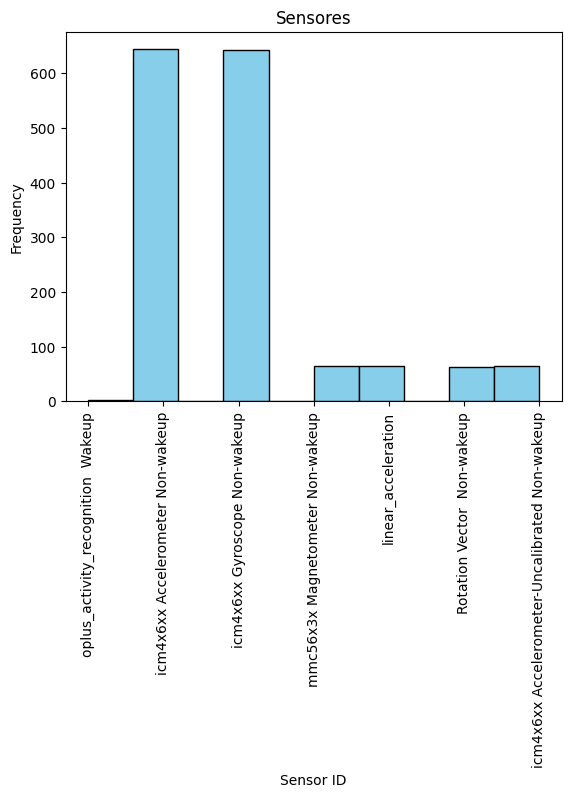

In [8]:
plt.hist(df['sensorId'], bins=10, color='skyblue', edgecolor='black')
plt.title('Sensores')
plt.xlabel('Sensor ID')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

/var/folders/yc/0swbxvm5439b_sm2kmhry2hm0000gn/T/ipykernel_3573/1702941101.py:6: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  sensor_values_acc = df_accelerometer['data'].apply(pd.Series)


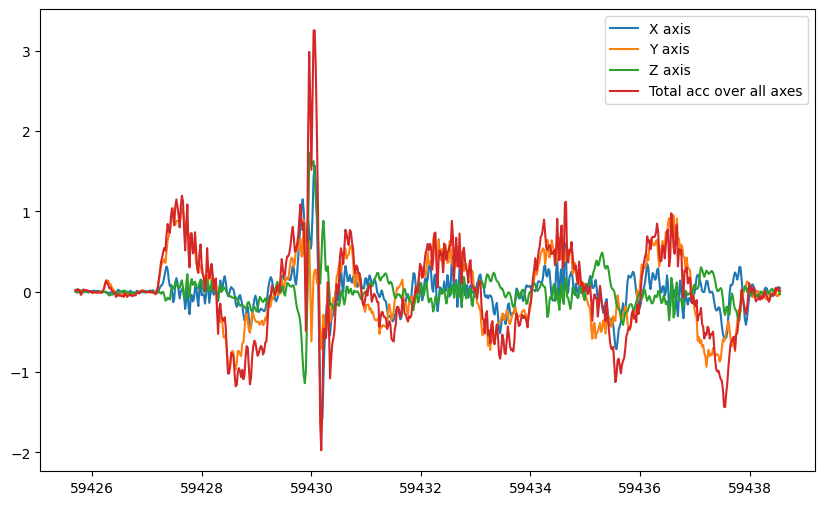

In [9]:
sensor_ids = df['sensorId'].unique()
sensor_data = {sensor_id: df[df['sensorId'] == sensor_id] for sensor_id in sensor_ids}
df_accelerometer = sensor_data['icm4x6xx Gyroscope Non-wakeup']
df_accelerometer.reset_index(drop=True, inplace=True)

sensor_values_acc = df_accelerometer['data'].apply(pd.Series)
sensor_values_acc.columns = ['x-axis','y-axis','z-axis']
sensor_values_acc['timestamps'] = df_accelerometer['timestamp'].reset_index(drop=True)
sensor_values_acc['Absolute_acceleration'] = sensor_values_acc[['x-axis','y-axis','z-axis']].sum(axis=1)
plt.figure(figsize=(10,6))
plt.plot(sensor_values_acc['timestamps'], sensor_values_acc['x-axis'], label='X axis')
plt.plot(sensor_values_acc['timestamps'], sensor_values_acc['y-axis'], label='Y axis')
plt.plot(sensor_values_acc['timestamps'], sensor_values_acc['z-axis'], label='Z axis')
plt.plot(sensor_values_acc['timestamps'], sensor_values_acc['Absolute_acceleration'], label='Total acc over all axes')
plt.legend()
plt.show()

/var/folders/yc/0swbxvm5439b_sm2kmhry2hm0000gn/T/ipykernel_3573/2070728069.py:6: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  sensor_values_acc = df_accelerometer['data'].apply(pd.Series)


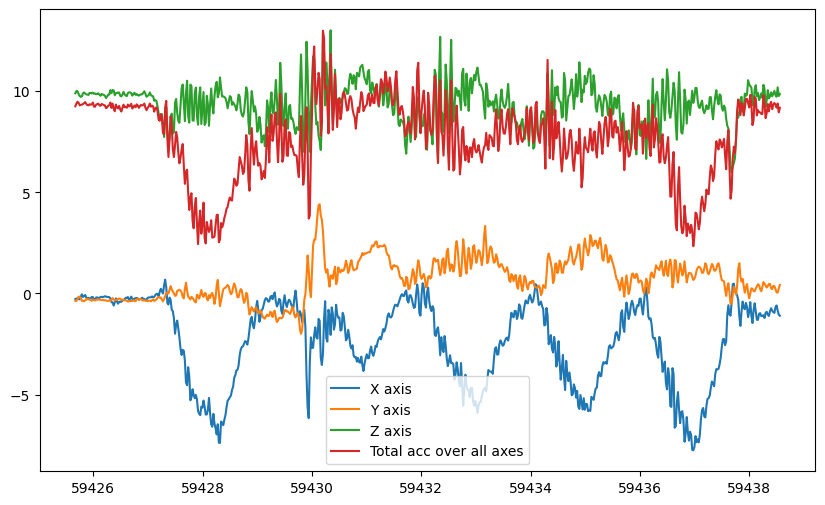

In [10]:
sensor_ids = df['sensorId'].unique()
sensor_data = {sensor_id: df[df['sensorId'] == sensor_id] for sensor_id in sensor_ids}
df_accelerometer = sensor_data['icm4x6xx Accelerometer Non-wakeup']
df_accelerometer.reset_index(drop=True, inplace=True)

sensor_values_acc = df_accelerometer['data'].apply(pd.Series)
sensor_values_acc.columns = ['x-axis','y-axis','z-axis']
sensor_values_acc['timestamps'] = df_accelerometer['timestamp'].reset_index(drop=True)
sensor_values_acc['Absolute_acceleration'] = sensor_values_acc[['x-axis','y-axis','z-axis']].sum(axis=1)
plt.figure(figsize=(10,6))
plt.plot(sensor_values_acc['timestamps'], sensor_values_acc['x-axis'], label='X axis')
plt.plot(sensor_values_acc['timestamps'], sensor_values_acc['y-axis'], label='Y axis')
plt.plot(sensor_values_acc['timestamps'], sensor_values_acc['z-axis'], label='Z axis')
plt.plot(sensor_values_acc['timestamps'], sensor_values_acc['Absolute_acceleration'], label='Total acc over all axes')
plt.legend()
plt.show()

In [11]:
# Function to preprocess sensor data
def preprocess_sensor_data(df, sensor_id):
    df_sensor = df[df['sensorId'] == sensor_id].reset_index(drop=True)
    sensor_values = df_sensor['data'].apply(pd.Series)
    sensor_values.columns = ['x-axis', 'y-axis', 'z-axis']
    sensor_values['timestamps'] = df_sensor['timestamp'].reset_index(drop=True) / 1000000000
    sensor_values['resultant'] = np.sqrt(sensor_values['x-axis']**2 + sensor_values['y-axis']**2 + sensor_values['z-axis']**2)
    return sensor_values

In [12]:
# Function to calculate push-up metrics
def calculate_pushup_metrics(sensor_values):
    # Detect peaks (push-up completion) and troughs (push-up start) based on resultant acceleration
    threshold = sensor_values['resultant'].mean() + sensor_values['resultant'].std()
    peaks = sensor_values[(sensor_values['resultant'].shift(1) < sensor_values['resultant']) & 
                          (sensor_values['resultant'].shift(-1) < sensor_values['resultant']) & 
                          (sensor_values['resultant'] > threshold)]
    troughs = sensor_values[(sensor_values['resultant'].shift(1) > sensor_values['resultant']) & 
                            (sensor_values['resultant'].shift(-1) > sensor_values['resultant']) & 
                            (sensor_values['resultant'] < threshold)]
    
    num_pushups = min(len(peaks), len(troughs))

    # Calculate consistency
    peak_intervals = peaks['timestamps'].diff().dropna()
    trough_intervals = troughs['timestamps'].diff().dropna()
    consistency = peak_intervals.std() + trough_intervals.std()

    # Calculate average duration of each push-up
    pushup_durations = peak_intervals.dropna()
    avg_duration = pushup_durations.mean()

    # Calculate lowering and lifting times
    lowering_times = []
    lifting_times = []

    for i in range(min(len(troughs), len(peaks)) - 1):
        lowering_time = troughs['timestamps'].iloc[i] - peaks['timestamps'].iloc[i]
        lifting_time = peaks['timestamps'].iloc[i + 1] - troughs['timestamps'].iloc[i]
        lowering_times.append(lowering_time)
        lifting_times.append(lifting_time)

    avg_lowering_time = np.mean(lowering_times)
    avg_lifting_time = np.mean(lifting_times)

    return num_pushups, consistency, avg_duration, avg_lowering_time, avg_lifting_time

In [13]:
# Preprocess accelerometer and gyroscope data
sensor_id_acc = 'icm4x6xx Accelerometer Non-wakeup'
sensor_id_gyro = 'icm4x6xx Gyroscope Non-wakeup'
sensor_values_acc = preprocess_sensor_data(df, sensor_id_acc)
sensor_values_gyro = preprocess_sensor_data(df, sensor_id_gyro)

/var/folders/yc/0swbxvm5439b_sm2kmhry2hm0000gn/T/ipykernel_3573/163358203.py:4: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  sensor_values = df_sensor['data'].apply(pd.Series)
/var/folders/yc/0swbxvm5439b_sm2kmhry2hm0000gn/T/ipykernel_3573/163358203.py:4: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  sensor_values = df_sensor['data'].apply(pd.Series)


In [14]:
# Calculate push-up metrics
num_pushups, consistency, avg_duration, avg_lowering_time, avg_lifting_time = calculate_pushup_metrics(sensor_values_acc)

# Display results
results = {
    "Number of push-ups": num_pushups,
    "Consistency (std dev of intervals)": consistency,
    "Average duration of each push-up (s)": avg_duration,
    "Average lowering time (s)": avg_lowering_time,
    "Average lifting time (s)": avg_lifting_time
}

results_df = pd.DataFrame([results])
print("Push-Up Analysis Results")
print(results_df)

Push-Up Analysis Results
   Number of push-ups  Consistency (std dev of intervals)  \
0                  50                        3.429279e-10   

   Average duration of each push-up (s)  Average lowering time (s)  \
0                          1.901752e-10              -4.182221e-09   

   Average lifting time (s)  
0              4.372396e-09  


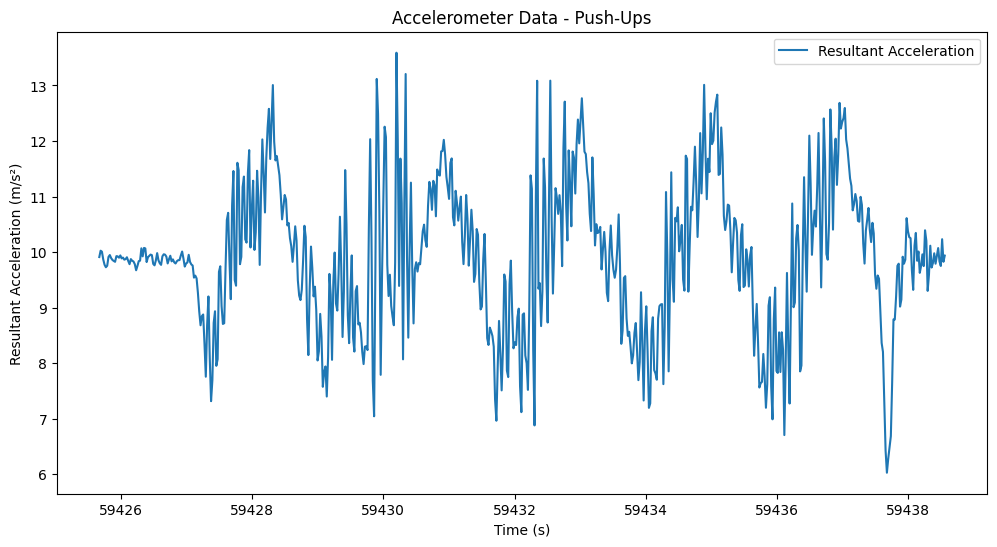

In [22]:
# Plot accelerometer data
plt.figure(figsize=(12, 6))
plt.plot(sensor_values_acc['timestamps'], sensor_values_acc['resultant'], label='Resultant Acceleration')
plt.title('Accelerometer Data - Push-Ups')
plt.xlabel('Time (s)')
plt.ylabel('Resultant Acceleration (m/s²)')
plt.legend()
plt.show()

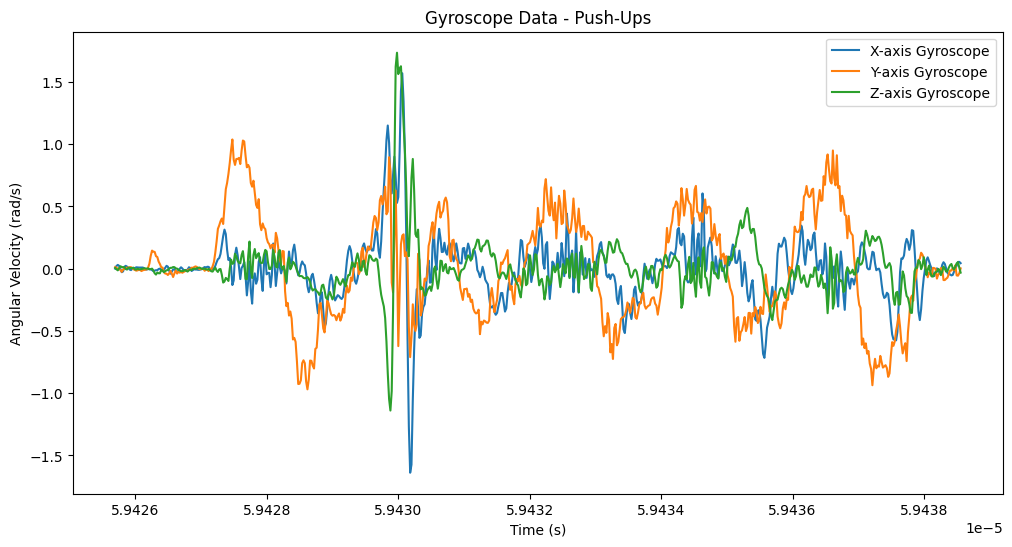

In [16]:
# Plot gyroscope data
plt.figure(figsize=(12, 6))
plt.plot(sensor_values_gyro['timestamps'], sensor_values_gyro['x-axis'], label='X-axis Gyroscope')
plt.plot(sensor_values_gyro['timestamps'], sensor_values_gyro['y-axis'], label='Y-axis Gyroscope')
plt.plot(sensor_values_gyro['timestamps'], sensor_values_gyro['z-axis'], label='Z-axis Gyroscope')
plt.title('Gyroscope Data - Push-Ups')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()
plt.show()

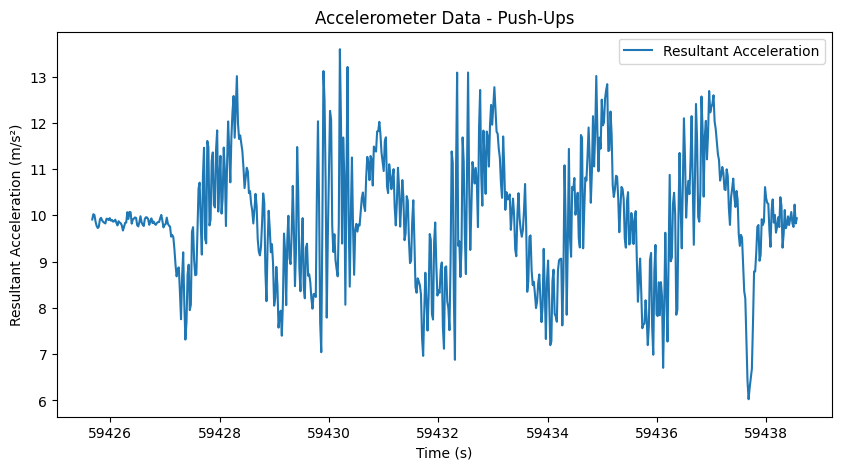

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(sensor_values_acc['timestamps'], sensor_values_acc['resultant'], label='Resultant Acceleration')
plt.title('Accelerometer Data - Push-Ups')
plt.xlabel('Time (s)')
plt.ylabel('Resultant Acceleration (m/s²)')
plt.legend()
plt.show()